# Installazione delle librerie richieste

In [ ]:
!pip install wordcloud
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/539.2 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 348.2/539.2 kB 10.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 9.6 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/40.5 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/57.7 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.5 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.5/1.5 MB 45.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/803.4 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803

In [ ]:
# contiene strumenti e dataset per tokenizzare, rimuovere stopwords, analizzare grammatica e creare modelli di linguaggi
import nltk

# È un corpus di stopwords ovvero una lista di parole frequenti che non hanno significato linguistico
from nltk.corpus import stopwords

# Serve a dividere una frase in singole parole (token)
from nltk.tokenize import word_tokenize

# Data manipulation con pandas
import pandas as pd

# Definizioni di variabili o parametri in maniera chiara e riutilizzabili
from typing import List, Tuple, Union
from typing import Callable, Dict

# Libreria python per lavorare con big data in modo distribuito
# Funzioni SQL integrate nel modulo di pyspark

from pyspark.sql.functions import size, split, count, col, avg, min as sp_min, max as sp_max, round as spark_round, lit, concat
from pyspark.sql import Row, DataFrame

# Permette la generazione di nuvole di parole a partire da un testo e visualizzarle
from wordcloud import WordCloud

# Ci permette di creare grafici
import matplotlib.pyplot as plt
import numpy as np

# PySpark MLlib ovvero il modulo di Machine LEarning di Spark che aiutano a costruire e addestrare pipeline di machine learning su grandi dataset
from pyspark.ml.feature import CountVectorizer, Tokenizer, StandardScaler, StringIndexer, StopWordsRemover
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

#Metrica
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# Downloading NLTK packages for removing stopwords from text
nltk.download('stopwords')
nltk.download('punkt')

# Definition of stopwords list (English text -> English stopwords)
stopwords_default = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# EDA


In [ ]:

# comando di shell  per scaricare il dataset dall'URL dell'archivio e salvataggio locale nella directory driver
!wget -P /databricks/driver https://proai-datasets.s3.eu-west-3.amazonaws.com/wikipedia.csv

# creazione dataframe pandas
dataset = pd.read_csv('/databricks/driver/wikipedia.csv')

# creazione dataframe spark da pandas
spark_df = spark.createDataFrame(dataset)

# drop colonna indesiderata che contiene l'indice
spark_df = spark_df.drop("Unnamed: 0")

# Mostra il dataframe in maniera interattiva
display(spark_df)

--2025-10-21 13:04:00--  https://proai-datasets.s3.eu-west-3.amazonaws.com/wikipedia.csv
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 3.5.204.14, 16.12.19.18
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|3.5.204.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1003477941 (957M) [text/csv]
Saving to: ‘/databricks/driver/wikipedia.csv’

wikipedia.csv       100%[===================>] 956.99M  97.1MB/s    in 10s     

2025-10-21 13:04:10 (96.1 MB/s) - ‘/databricks/driver/wikipedia.csv’ saved [1003477941/1003477941]



title summary documents categoria economics economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. definitions of economics over time the earlier term for the discipline was 'political economy', but since the late 19th century, it has commonly been called 'economics'. the term is ultimately derived from ancient greek οἰκονομία (oikonomia) which is a term for the "way (nomos) to run a household (oikos)", or in other words the know-how of an οἰκονομικός (oikonomikos), or "household or homestead manager". derived terms such as "economy" can therefore often mean "frugal" or "thrifty". by extension then, "political economy" was the way to manage a polis or state. there are a variety of modern definitions of economics; some reflect evolving views of the subject or different views among economists. scottish philosopher adam smith (1776) defined what was then called political economy as "an inquiry into the nature and causes of the wealth of nations", in particular as: a branch of the science of a statesman or legislator [with the twofold objectives of providing] a plentiful revenue or subsistence for the people ... [and] to supply the state or commonwealth with a revenue for the publick services. jean-baptiste say (1803), distinguishing the subject matter from its public-policy uses, def

# Esplorazione dei dati

In [ ]:
# Visualizzaione delle categorie uniche presenti nel dataset
categoria_s = spark_df.select('categoria').distinct()
categoria_s.show()
print(f"Number of categories = {categoria_s.count()} \n")

# Mostra valori nulli e statistica
print(dataset.isnull().sum())
print(dataset.describe())

+-----------+
|  categoria|
+-----------+
|  economics|
|   politics|
|    culture|
|    science|
|     sports|
|     energy|
|    finance|
| humanities|
|       pets|
|      trade|
| technology|
|  transport|
|   medicine|
|engineering|
|   research|
+-----------+

Number of categories = 15 

Unnamed: 0      0
title           0
summary       928
documents     928
categoria       0
dtype: int64
          Unnamed: 0
count  153232.000000
mean     5112.218140
std      2958.116613
min         0.000000
25%      2553.000000
50%      5107.000000
75%      7661.000000
max     11357.000000


# Pulizia dei dati

In [ ]:

# Check se le righe nulle in "summary" e "documents" corrispondono

# Creazione nuova colonna both_null per vedere se sono null, 1 s entrambi sono nulli, 0 altrimenti
spark_df = spark_df.withColumn("both_null", col("summary").isNull() & col("documents").isNull())

# Filtrazione per righe con null True ovvero i casi dove entrambe le colonne sono nulle
both_null_df = spark_df.filter(col("both_null"))

# Count delle righe dove entrambe le colonne sono nulli
count_both_null = both_null_df.count()
print(f"Number of rows where both 'summary' and 'documents' are null: {count_both_null}")

# Fill dei valori nulli con stringhe vuote sia in summary che documents, dato che le righe contengono dati validi per le altre colonne
spark_df = spark_df.fillna({'summary': '', 'documents': ''})

Number of rows where both 'summary' and 'documents' are null: 928


# Feature enginiring

In [ ]:
# Conteggio articoli per categoria
article_count = spark_df.groupBy('categoria').agg(count('title').alias('num_articles'))
display(article_count)

categoria num_articles economics 10110 politics 11358 culture 10372 science 10236 sports 10068 energy 10046 finance 10157 humanities 10236 pets 10023 trade 10068 technology 10095 transport 10130 medicine 10076 engineering 10220 research 10037

In [ ]:

# Creazione dataframe che contiene le colonne con il numero di parole nella colonna 'summary' e 'documents'
df = spark_df.withColumn('num_summary_words', size(split(col('summary'), ' ')))\
             .withColumn('num_documents_words', size(split(col('documents'), ' ')))\
             .withColumn('tot_num_words', col('num_summary_words') + col('num_documents_words'))

# Statistiche aggregate per categoria
results = df.groupBy('categoria').agg(
    count('title').alias('num_articles'), # numero di articoli per categoria
    spark_round(avg('tot_num_words'), 2).alias('avg_num_words'), # media di parole per articolo
    sp_min('tot_num_words').alias('num_words_shortest_article'), # numero di parole nel più breve articolo
    sp_max('tot_num_words').alias('num_words_longest_article')) # numero di parole nel più lungo articolo
display(results)

categoria num_articles avg_num_words num_words_shortest_article num_words_longest_article economics 10110 1096.63 18 24621 politics 11358 1693.13 16 20174 culture 10372 740.93 2 16112 science 10236 1967.72 2 29441 sports 10068 682.67 2 19871 energy 10046 683.54 2 23776 finance 10157 1965.96 2 33497 humanities 10236 1133.61 2 23278 pets 10023 495.42 2 13409 trade 10068 748.83 2 20275 technology 10095 991.54 2 18426 transport 10130 714.57 2 22471 medicine 10076 886.46 2 18882 engineering 10220 813.97 2 12416 research 10037 785.28 2 27333

In [ ]:
# Concatenazione delle colonne 'summary' e 'documents' separate da uno spazio per creare una colonna 'sum_doc'
df_cw = df.withColumn('sum_doc', concat(col('summary'), lit(' '), col('documents')))

# Word Cloud

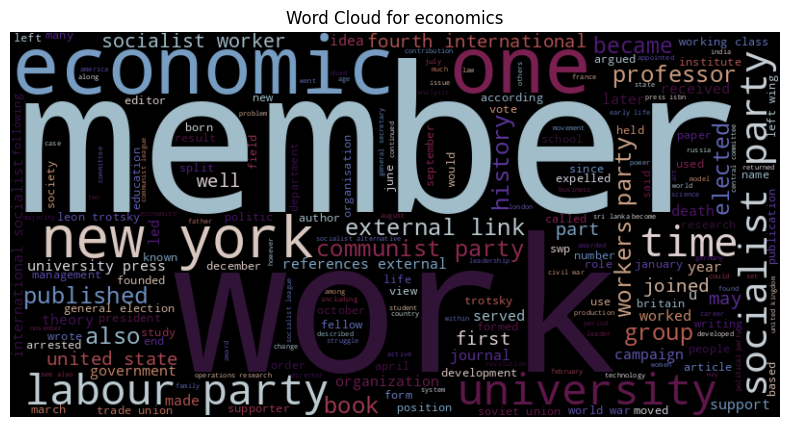

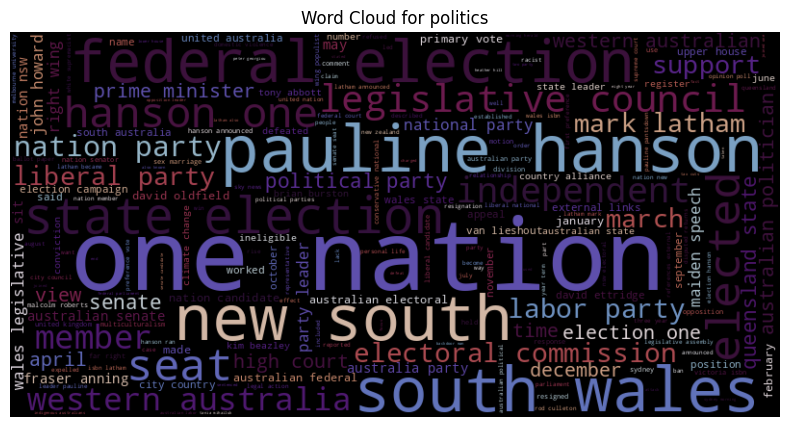

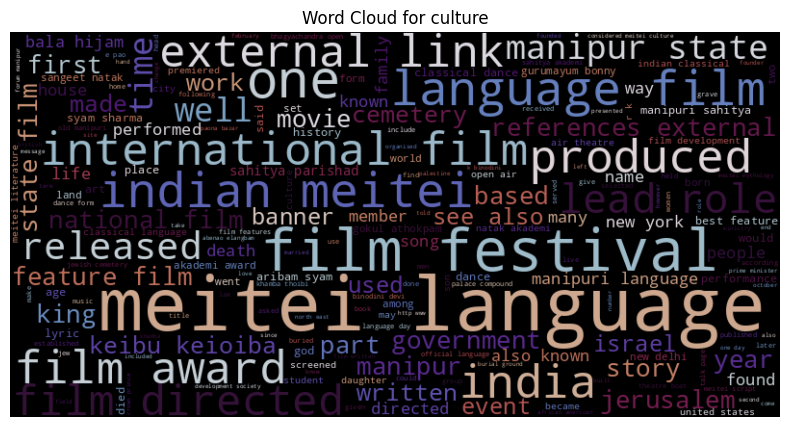

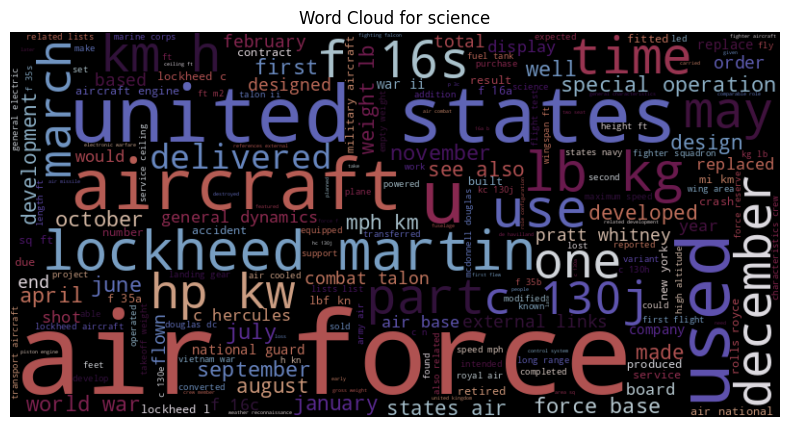

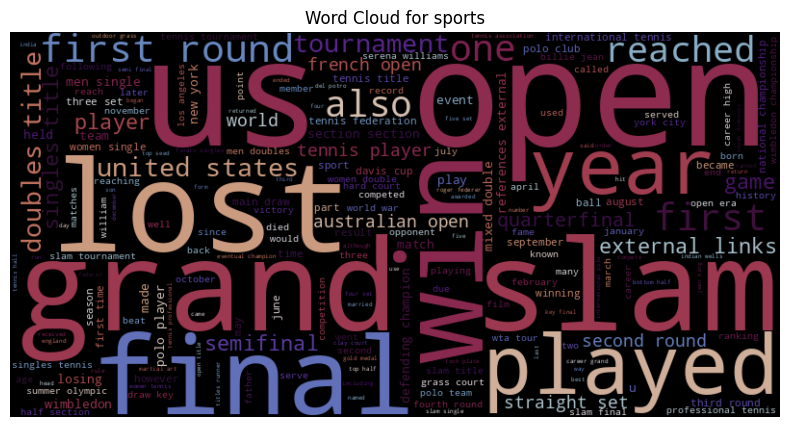

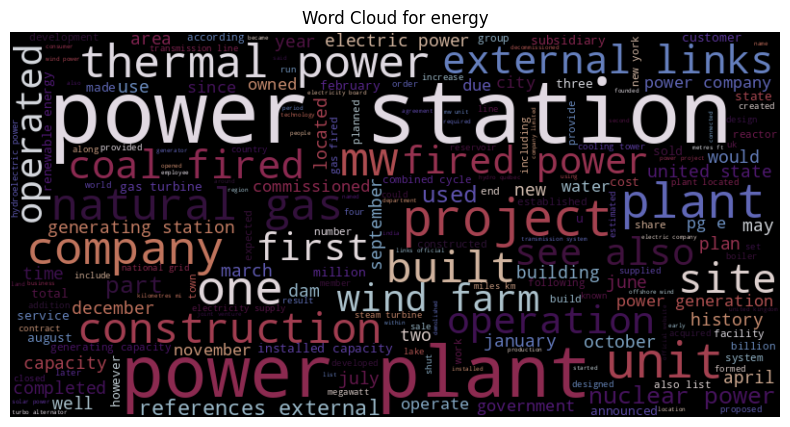

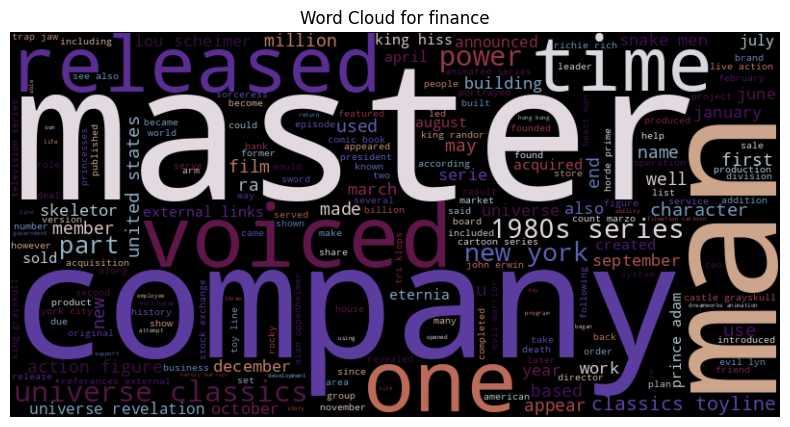

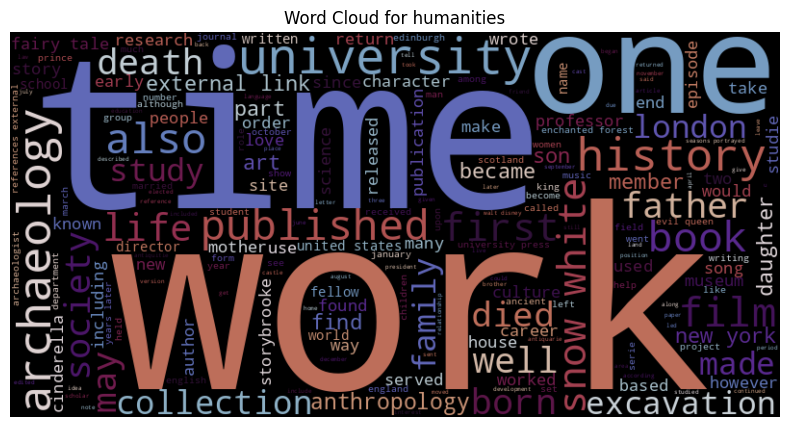

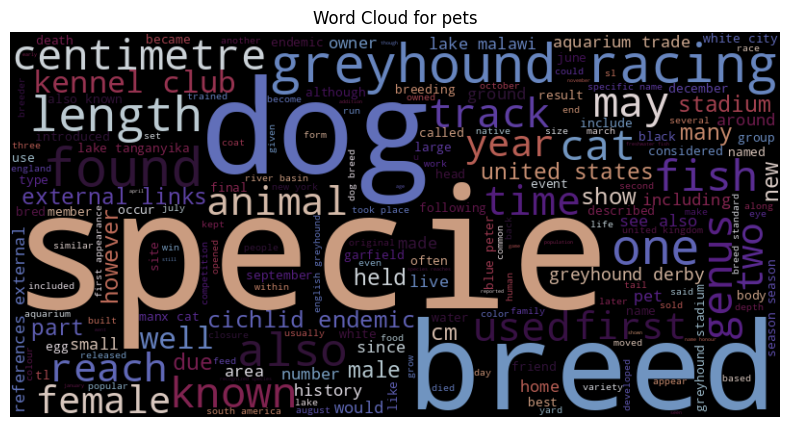

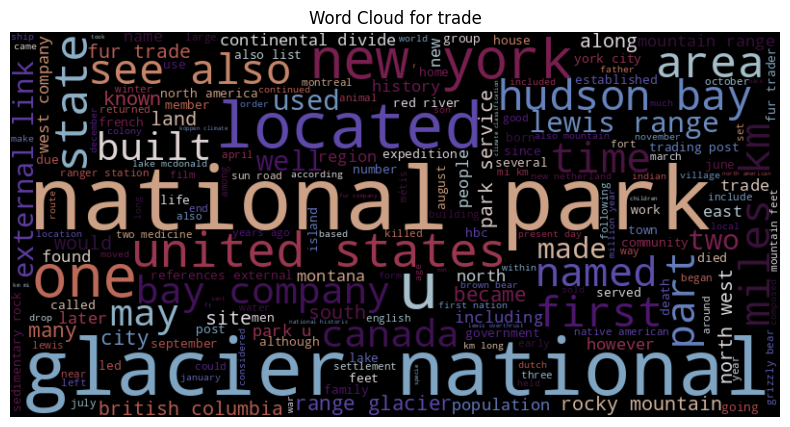

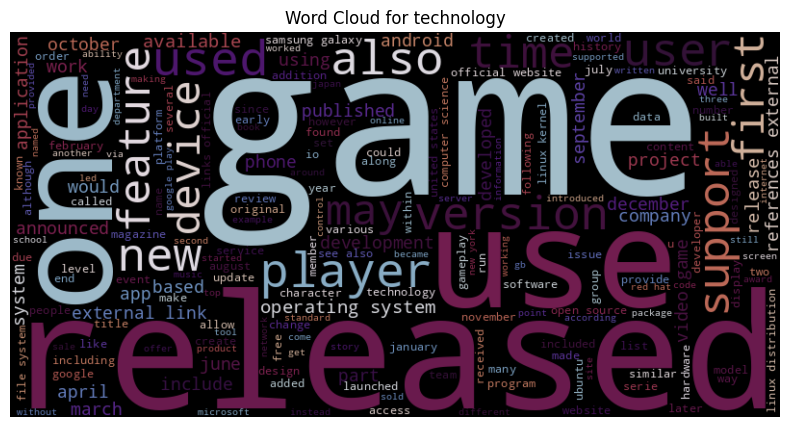

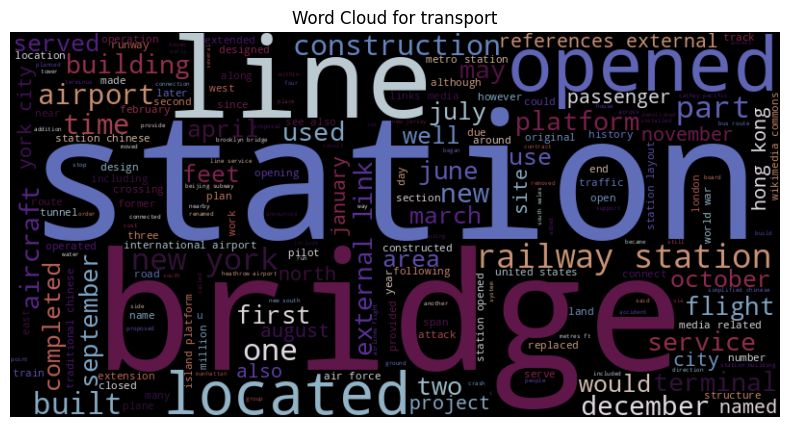

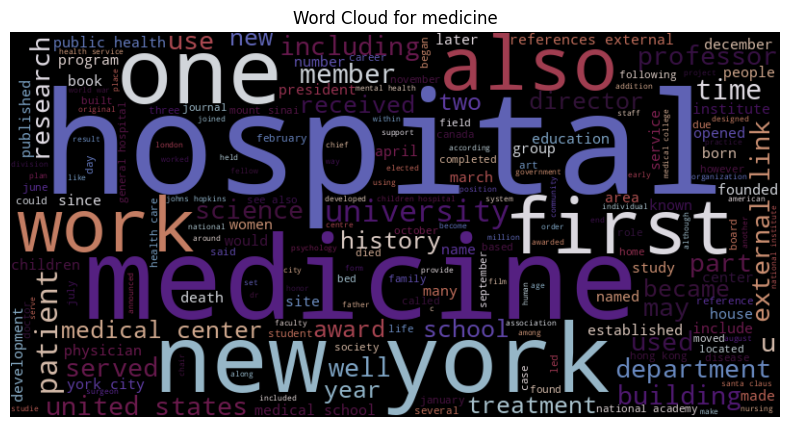

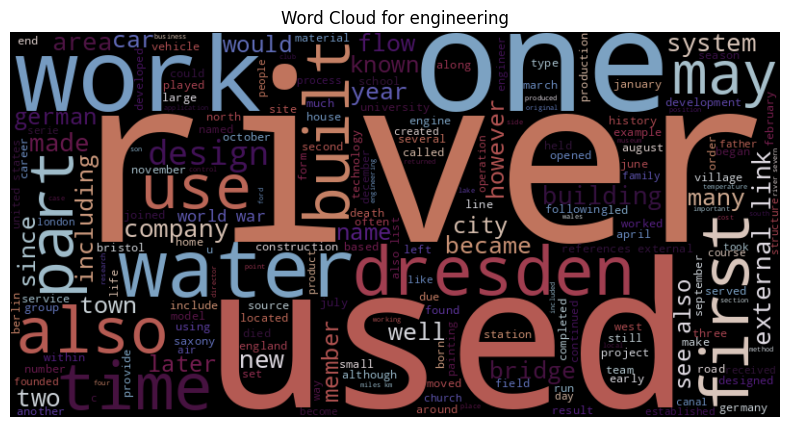

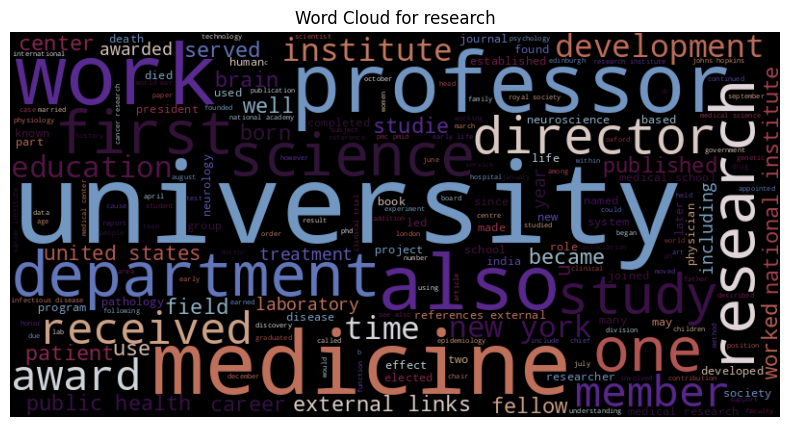

In [ ]:

# loop lungo le categorie uniche presenti nel dataset
for category in df_cw.select('categoria').distinct().collect():    #recupera i valori unici utilizzando distinct() e li raccoglie in un elenco di righe utilizzando collect()

    # Unisci con uno spazio i valori di sum_doc delle righe raccolte filtrando il DataFrame per includere solo quelle in cui la colonna category corrisponde alla categoria corrente nel ciclo.

    # Creazione per ogni categoria di un grande testo concatenato
    text = " ".join(row.sum_doc for row in df_cw.filter(df_cw.categoria == category.categoria).select("sum_doc").collect())

    # Generazione Word Cloud per ogni categoria
    wordcloud = WordCloud(width=800, height=400, colormap='twilight', stopwords=stopwords_default).generate(text)

    # Show delle Word Cloud per ogni categoria
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {category['categoria']}")
    plt.show()

# Classificazione

In [ ]:
def evaluate_model(predictions: DataFrame, labelCol: str = 'target', predictionCol: str = 'prediction') -> Dict[str, float]:
    """
    Evaluation delle predizioni utilizzando più metriche.

    Args:
        predictions (DataFrame): Il dataframe contenente le predizioni.
        labelCol (str): Nomi delle colonne con le etichette.
        predictionCol (str): Il nome della colonna con le predizioni del modello.

    Returns:
        Dict[str, float]: Un dizionario Python con le metriche di valutazione ed i rispettivi valori.
    """
    metrics = ['accuracy', 'f1']
    results = {}

    for metric in metrics:

        # classe valutazione di PySpark
        evaluator = MulticlassClassificationEvaluator(labelCol=labelCol, predictionCol=predictionCol, metricName=metric)
        results[metric] = np.round(evaluator.evaluate(predictions), 4)

    return results


def pipe_transf(inputCol: str, model_type) -> Pipeline:
    """
    Creazione di una pipeline per processazione del testo e training del modello

    Args:
        inputCol (str): Il nome della colonna input contenente il testo.
        model_type:Il tipo di modello da usare dentro la pipeline.

    Returns:
        Pipeline: Un oggetto Pipeline Spark di ML.
    """
    # Divisione testo in parole singole
    tokenizer = Tokenizer(inputCol=inputCol, outputCol='tokens')

    # Rimuove le stopwords ovvero le parole che non aggiungono significato
    remover = StopWordsRemover(inputCol='tokens', outputCol='filtered_tokens', stopWords=stopwords_default)

    # Trasforma l'elenco di parole in un vettore numerico che rappresenta la frequenza di ciascun termine (bag of words)
    counter = CountVectorizer(inputCol='filtered_tokens', outputCol='counter_features')

    # Normalizza i vettori per evitare che termini molto frequenti dominino la classificazione
    scaler = StandardScaler(inputCol='counter_features', outputCol='scaled_features')

    # Inserisce nella pipeline il modello
    modeler = model_type(featuresCol='scaled_features', labelCol='target')

    # Creazione della Pipeline che unisce tutti i passaggi in un'unica pipeline sequenziale
    # testo -> tokens -> tokens puliti -> vettori -> dati scalati -> modello

    pipe = Pipeline(stages=[tokenizer, remover, counter, scaler, modeler])


    return pipe


def fit_and_transform(pipe: Pipeline, train: DataFrame, test: DataFrame) -> (DataFrame, DataFrame):
    """
    Addestra la pipeline con i dati di training e trasforma i dati di training e di test.

    Args:
        pipe (Pipeline): L'oggetto Pipeline Spark di ML.
        train (DataFrame): Il DataFrame di training.
        test (DataFrame): Il DataFrame di Test.

    Returns:
        (DataFrame, DataFrame): - pred_train che contiene le predizioni per i dati di training
                                - pred_test che contiene le predizioni per i dati di test.
    """
    model = pipe.fit(train)
    pred_train = model.transform(train)
    pred_test = model.transform(test)

    return pred_train, pred_test


def print_evaluation(pred_train: DataFrame, pred_test: DataFrame):
    """
    Stampa le metriche di valutazione per i dati di training e di test.

    Args:
        pred_train (DataFrame): contiene le predizioni per i dati di training.
        pred_test (DataFrame): contiene le predizioni per i dati di test.
    """


    evaluation_results_train = evaluate_model(pred_train)
    print("Training Data Evaluation:")
    for metric, value in evaluation_results_train.items():
        print(f"{metric.capitalize()}: {value:.3f}")

    evaluation_results_test = evaluate_model(pred_test)
    print("\nTest Data Evaluation:")
    for metric, value in evaluation_results_test.items():
        print(f"{metric.capitalize()}: {value:.3f}")

# Preprocessing

In [ ]:

# Converte le stringhe categoriche in indici numerici
indexer = StringIndexer(inputCol='categoria', outputCol='target')
df_class = indexer.fit(df_cw).transform(df_cw)


# Mostra l'indicizzazione confrontando le categorie con gli indici ottenuti.
target = df_class.select('categoria', 'target').distinct().orderBy('target')
display(target)

🏃 View run nosy-stag-25 at: https://adb-809403257879527.7.azuredatabricks.net/ml/experiments/3271192767483564/runs/d8f11ec29b8143c5963f5135a687abb6
🧪 View experiment at: https://adb-809403257879527.7.azuredatabricks.net/ml/experiments/3271192767483564


categoria target politics 0.0 culture 1.0 humanities 2.0 science 3.0 engineering 4.0 finance 5.0 transport 6.0 economics 7.0 technology 8.0 medicine 9.0 sports 10.0 trade 11.0 energy 12.0 research 13.0 pets 14.0

In [ ]:
# Divisione del Dataset in training e test
# Train 80% e Test 20%
train, test = df_class.randomSplit([0.8, 0.2], seed=0)

# Modello

## Colonna Summary

In [ ]:

pipe_summary = pipe_transf('summary', LogisticRegression)

In [ ]:
pred_train_sum, pred_test_sum = fit_and_transform(pipe_summary, train, test)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

🏃 View run useful-shark-652 at: https://adb-809403257879527.7.azuredatabricks.net/ml/experiments/3271192767483564/runs/a670ccefd566487384403261deb65269
🧪 View experiment at: https://adb-809403257879527.7.azuredatabricks.net/ml/experiments/3271192767483564


In [ ]:
print_evaluation(pred_train_sum, pred_test_sum)

Training Data Evaluation:
Accuracy: 0.989
F1: 0.989

Test Data Evaluation:
Accuracy: 0.916
F1: 0.916


## Colonna Documents

In [ ]:
pipe_documents = pipe_transf('documents', LogisticRegression)

In [ ]:
pred_train_doc, pred_test_doc = fit_and_transform(pipe_documents, train, test)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

🏃 View run welcoming-goose-565 at: https://adb-809403257879527.7.azuredatabricks.net/ml/experiments/3271192767483564/runs/6869f09dbd8d4a45af50f71a1016f6b3
🧪 View experiment at: https://adb-809403257879527.7.azuredatabricks.net/ml/experiments/3271192767483564


In [ ]:
print_evaluation(pred_train_doc, pred_test_doc)

Training Data Evaluation:
Accuracy: 0.988
F1: 0.988

Test Data Evaluation:
Accuracy: 0.930
F1: 0.930
